<h1>Detección de líneas - Hough Lines</h1>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

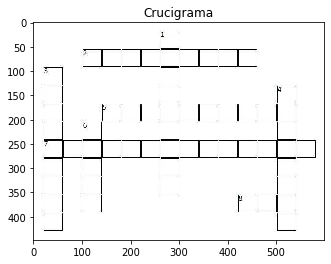

In [5]:
image = cv2.imread('crucigrama.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Crucigrama'); plt.show()
cv2.imwrite('crucigrama.jpg', image);

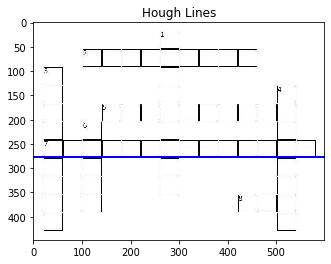

In [6]:
original_image = image.copy()
# Escala de grises y canny edges
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

# Utilizar HoughLines con una precisión rho de 1 pixel
# precisión theta de np.pi / 180 que es 1 grado
# Nuestro umbral de linea esta seteado en 240 (número de puntos en línea)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 240)

# Iteramos sobre cada línea y la convertimos al formato requerido por cv.lines
for rho, theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(original_image, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Hough Lines'); 
plt.show()

<h4>Probabilistic Hough Lines</h4>
<b>cv2.HoughLinesP(binarized image, 𝜌 accuracy, 𝜃 accuracy, threshold, minimum line length, max line gap)</b>

(63, 1, 4)


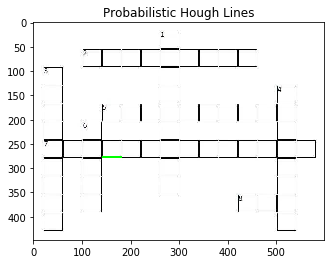

In [10]:

original_image = image.copy()
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

# Utilizamos las mismas precisiones rho y theta
# Especificamos un minimo de puntos en la línea de 100
# y minimo de longitud de la linea 5 pixels y maximo de distancia entre lineas de 10 pixels
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 200, 5, 10)
print (lines.shape)

for x1, y1, x2, y2 in lines[0]:
    cv2.line(original_image, (x1, y1), (x2, y2),(0, 255, 0), 3)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Probabilistic Hough Lines'); plt.show()